# Analysis of Top 1000 Submissions in r/Toronto
In this notebook, we will perform sentiment analysis, and some general analysis on the top 1k submissions in r/Toronto using the naive-bayes classification model we built previously, and some other tools. We will be using Seaborn to create plots.

## Setup
The dependancies are listed out in requirements.txt. They can be quickly installed with Pip by running the following command

`python -m pip -r requirements.txt`

In [224]:
import pandas as pd
import pickle
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.tokenize import sent_tokenize, word_tokenize
from train import cleanup_sentence, sentence_to_dict

sns.set_theme()

TITLE = 'r/Toronto'

### Loading our pretrained model

In [263]:
_classifier = open('bin/classifier.o', 'rb')
classifier = pickle.load(_classifier)

### Loading Dataset

In [ ]:
df = pd.read_csv('data/toronto_dump.csv')
df['author'].convert_dtypes()
df['author'].fillna(value='Unknown', inplace=True)

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

## Flairs that made it to top

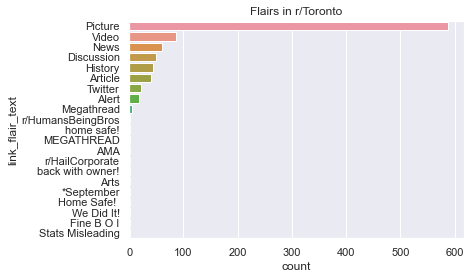

In [267]:
flairs = df.loc[:]['link_flair_text']

flairs = pd.DataFrame.from_dict(Counter(flairs), orient='index')
flairs = flairs.sort_values(by=0, ascending=False)

ax = sns.countplot(y='link_flair_text', data=df, order=df['link_flair_text'].value_counts().index)
ax = ax.set(title='Flairs in r/Toronto')

Pitures, Videos, and news are amongst the top flairs in r/Toronto. There are some flairs which are unavaiable for general usage such as 'Stats Misleading', or 'Fine B O I'.

## Positive or Negative Submission Title?

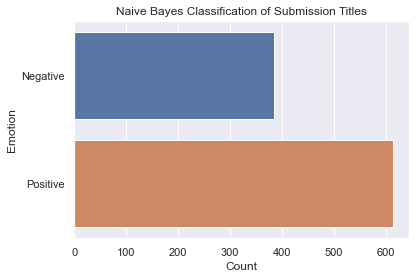

In [246]:
title_is_positive = []
for i, sentence in enumerate(df.loc[:]['title']):
    s = word_tokenize(str(sentence))
    s = cleanup_sentence(s)
    s = sentence_to_dict([s])
    
    inp = []
    for key in s:
        inp.append(key)
    
    pred = classifier.classify(key)
    title_is_positive.append('Positive' if pred else 'Negative')
        
        
df['title_is_positive'] = title_is_positive
ax = sns.countplot(y='title_is_positive', data=df)
ax = ax.set(xlabel='Count', ylabel='Emotion', title='Naive Bayes Classification of Submission Titles')

In [260]:
pos_count = df.loc[df['title_is_positive'] == 'Positive', 'title_is_positive'].count()
neg_count = len(df) - pos_count

print(pos_count, neg_count)

614 385


614/1000 submissions in r/Toronto all were classified as positive submissions.

## Top Contributors

In [185]:
contributors = {}
max_posts_count = -1
max_posts_author = ""
for contributor in df.loc[:]['author']:
    if contributor == 'Unknown':
        continue
        
    if contributor in contributors:
        contributors[contributor] += 1
        if contributors[contributor] > max_posts_count:
            max_posts_count = contributors[contributor]
            max_posts_author = contributor
    else:
        contributors[contributor] = 1
        
print('Number of unique contributors: {}'.format(len(contributors)))
print('Top contributor in {} all posts: {} ({} submissions)'.format(TITLE, max_posts_author, max_posts_count))

Number of unique contributors: 757
Top contributor in r/Toronto all posts: ur_a_idiet (16 submissions)


Out of 1000 top posts in r/Toronto. 75.7% of top posts were made by unique redditors. The person with the most submissions in *all* is **ur_a_idiet** with 16 submissions.

## Time of Submission

Most of the top posts (>70%) were submitted in the afternoon or evening. Few top posts were submitted at night.

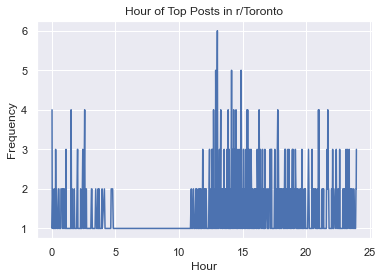

In [245]:
hours_of_submissions = df['created_utc'].dt.hour
minutes_of_submissions = df['created_utc'].dt.minute

times = []
for i in range(len(hours_of_submissions)):
    hour = hours_of_submissions[i]
    minute = minutes_of_submissions[i]
    
    times.append(hour + minute / 60.0)

times = numpy.array(times)
times, counts = numpy.unique(times, return_counts=True)

ax = sns.lineplot(x=times, y=counts)
ax = ax.set(xlabel='Hour', ylabel='Frequency', title='Hour of Top Posts in {}'.format(TITLE))

## Future Improvements
Some more details that can be looked into are submission Redditor's account age, what kinds of posts are made during certain periods of the day. The classification model can also be improved, which we talked about in that lab.

We shall also do the same analysis in r/Toronto, but for a different time period to compare the results. During the pandemic, probably more of the top posts would be news, and videos. Furthermore, we expect the hour of posts to be more uniform as most of the population are spending more time online. More negative submissions would also be expected.